# Thử nghiệm 1 vài thuật toán phân cụm

Đánh giá bằng DBI score và labels thực sự  
(DBI : trung bình của tổng phương sai chia khoảng cách giữa 2 tâm giữa từng cặp cụm)  


'Mô tả' dữ liệu có labels trong không gian giảm chiều LDA.  

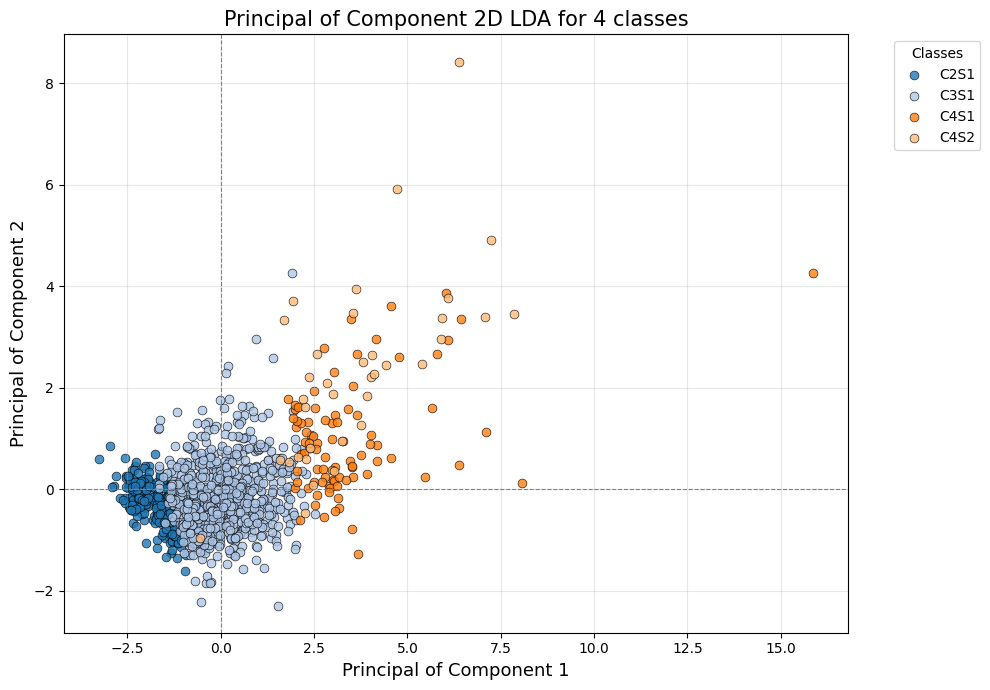

Silhouette Score for GMM with 4 clusters: 0.36992
DBCV for GMM with 4 clusters: -0.58674
Silhouette Score for Agglomerative Clustering with 4 clusters: 0.35078
DBCV for Agglomerative Clustering with 4 clusters: -0.57328


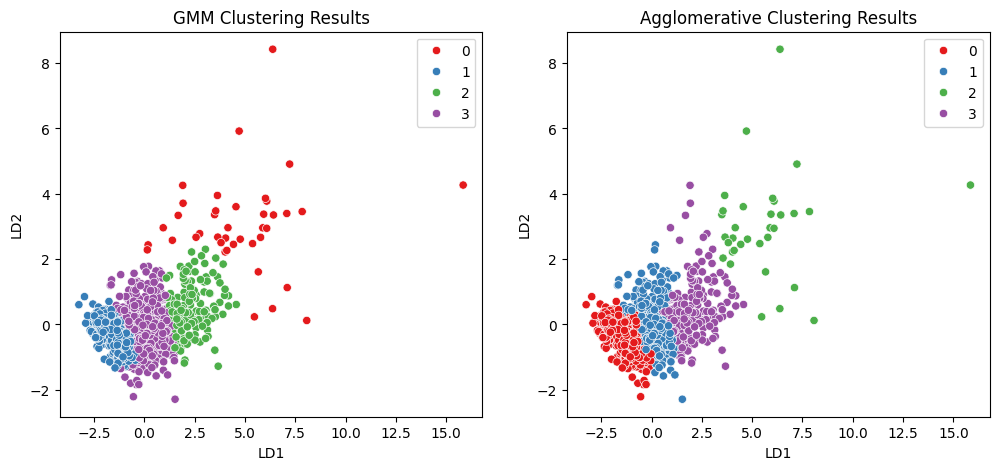

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from hdbscan.validity import validity_index
import seaborn as sns
import numpy as np


import os
BASE_DIR = os.path.dirname(
    os.path.dirname(
        os.path.dirname(
            os.path.abspath('notebook/preprocessing.ipynb'))))

df_4 = pd.read_csv(os.path.join(BASE_DIR, 'data/X_4_classes_LDA_2dims.csv'))

X_4 = df_4.drop(columns=['Classification'])
y_4 = df_4['Classification']
y_4_encoded = y_4.factorize()[0]

gmm_4 = GaussianMixture(n_components=4, random_state=42)
gmm_4.fit(X_4)
y_4_pred_gmm = gmm_4.predict(X_4)

silhouette_gmm = silhouette_score(X_4, y_4_pred_gmm)
print(f'Silhouette Score for GMM with 4 clusters: {round(silhouette_gmm, 5)}')
dbcv_gmm = validity_index(X_4.to_numpy(), y_4_pred_gmm)
print(f'DBCV for GMM with 4 clusters: {round(dbcv_gmm, 5)}')


agglo_4 = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_4_pred_agglo = agglo_4.fit_predict(X_4)

silhouette_agglo = silhouette_score(X_4, y_4_pred_agglo)
print(f'Silhouette Score for Agglomerative Clustering with 4 clusters: {round(silhouette_agglo, 5)}')
dbcv_agglo = validity_index(X_4.to_numpy(), y_4_pred_agglo)
print(f'DBCV for Agglomerative Clustering with 4 clusters: {round(dbcv_agglo, 5)}')

# Visualization of clustering results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_4.iloc[:, 0], y=X_4.iloc[:, 1], hue=y_4_pred_gmm, palette='Set1')
plt.title('GMM Clustering Results')
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_4.iloc[:, 0], y=X_4.iloc[:, 1], hue=y_4_pred_agglo, palette='Set1')
plt.title('Agglomerative Clustering Results')
plt.show()